In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

In [3]:
#Llamado a los datos que se encuentren en un repositorio remoto
data_salaries = pd.read_csv('https://raw.githubusercontent.com/ramssrez/proyectoDevF/master/data_cleaned_2021.csv')

In [4]:
data_salaries

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4,FL,11,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL,WA,56,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions,NY,23,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck",0,0,58,111,84.5,GSK,MA,191,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,other scientist,sr,M
738,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 - 5000,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",0,0,72,133,102.5,Eventbrite,TN,15,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,data engineer,sr,na
739,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 - 1000,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1,0,0,56,91,73.5,Software Engineering Institute,PA,37,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,other scientist,na,P
740,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 - 50,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,0,0,95,160,127.5,"Numeric, LLC",PA,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,na


In [6]:
data_salaries.shape

(742, 42)

In [7]:
data_salaries.describe()

,index,Rating,Founded,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,469.129380,3.618868,1837.154987,0.032345,0.022911,74.754717,128.214286,101.484501,47.524259,0.528302,0.225067,0.237197,0.522911,0.512129,0.088949,0.039084,0.052561,0.072776,0.097035,0.167116,0.199461,0.075472,0.013477,0.049865,0.018868
std,279.793117,0.801210,497.183763,0.177034,0.149721,30.945892,45.128650,37.482449,53.839080,0.499535,0.417908,0.425651,0.499812,0.500190,0.284862,0.193925,0.223305,0.259944,0.296205,0.373331,0.399865,0.264329,0.115384,0.217813,0.136150
min,0.000000,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,15.500000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,221.500000,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,472.500000,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,25.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,707.750000,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,60.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,955.000000,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,277.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df_cleane_bubble=data_salaries[["Avg Salary(K)", "Rating", "Industry", "Founded","Size"]]
#Limpieza de datos para los diferentes salarios
indexNames = df_cleane_bubble[ (df_cleane_bubble['Founded'] == -1)  | 
                              (df_cleane_bubble['Rating'] == -1) | 
                              (df_cleane_bubble['Industry'] == "-1")].index
by_year = df_cleane_bubble.sort_values('Founded')
by_year.drop(indexNames , inplace=True)
by_year.head(20)

,Avg Salary(K),Rating,Industry,Founded,Size
277,128.0,3.6,Auctions & Galleries,1744,1001 - 5000
178,161.5,3.7,Biotech & Pharmaceuticals,1781,10000+
172,151.5,3.7,Biotech & Pharmaceuticals,1781,10000+
261,140.0,3.7,Biotech & Pharmaceuticals,1781,10000+
676,154.5,3.7,Biotech & Pharmaceuticals,1781,10000+
259,151.5,3.7,Biotech & Pharmaceuticals,1781,10000+
289,102.5,3.7,Biotech & Pharmaceuticals,1781,10000+
270,161.5,3.7,Biotech & Pharmaceuticals,1781,10000+
342,154.5,3.7,Biotech & Pharmaceuticals,1781,10000+
174,140.0,3.7,Biotech & Pharmaceuticals,1781,10000+


C:\Users\ramss\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Founded', ylabel='Density'>

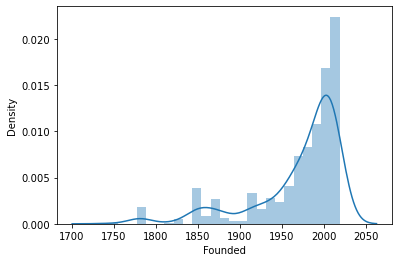

In [10]:
sns.distplot(by_year['Founded'])

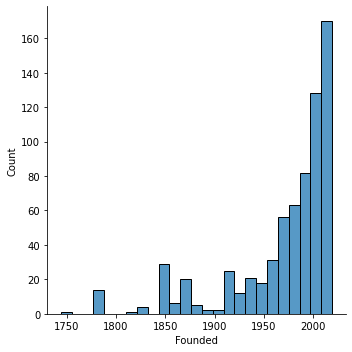

In [11]:
sns.displot(by_year['Founded'])

C:\Users\ramss\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

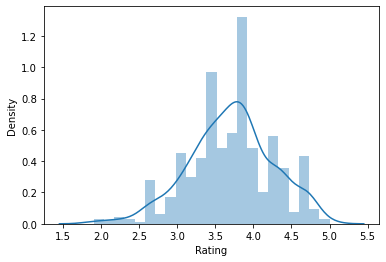

In [12]:
sns.distplot(by_year['Rating'])

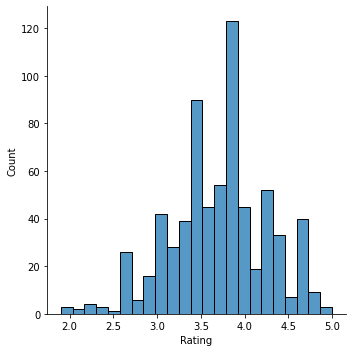

In [13]:
sns.displot(by_year['Rating'])

In [16]:
cormat = data_salaries.corr()

<AxesSubplot:>

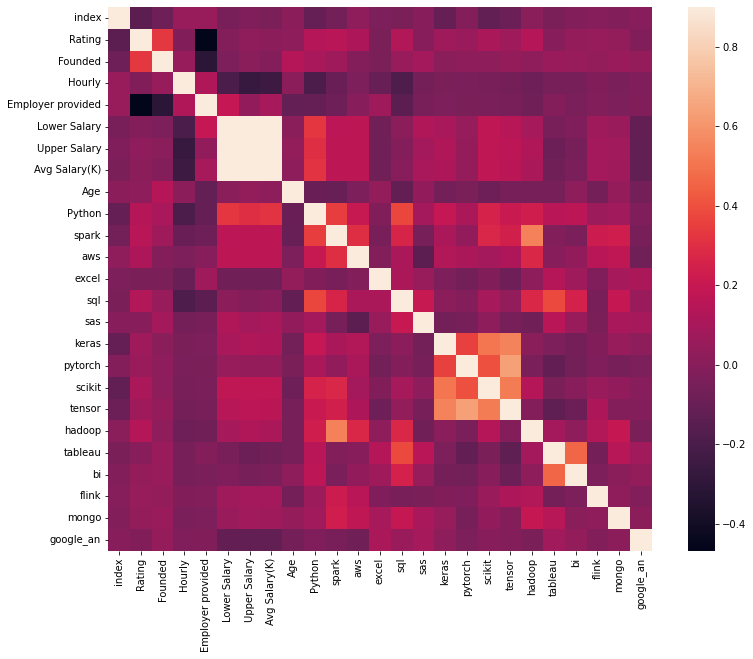

In [17]:
f,ax = plt.subplots(figsize = (13,10))
sns.heatmap(cormat, vmax=0.9, square = True)

In [18]:
by_year.groupby(['Industry'])['Rating'].mean()

Industry
Advertising & Marketing                     3.560000
Aerospace & Defense                         4.033333
Architectural & Engineering Services        4.450000
Auctions & Galleries                        3.600000
Banks & Credit Unions                       3.775000
Beauty & Personal Accessories Stores        2.200000
Biotech & Pharmaceuticals                   3.570755
Brokerage Services                          3.250000
Colleges & Universities                     2.642857
Computer Hardware & Software                4.064912
Construction                                3.300000
Consulting                                  4.021429
Consumer Product Rental                     3.933333
Consumer Products Manufacturing             3.170000
Department, Clothing, & Shoe Stores         2.900000
Education Training Services                 4.233333
Energy                                      3.842857
Enterprise Software & Network Solutions     3.907500
Farm Support Services                

Text(0.5, 1.0, 'Rating por industria')

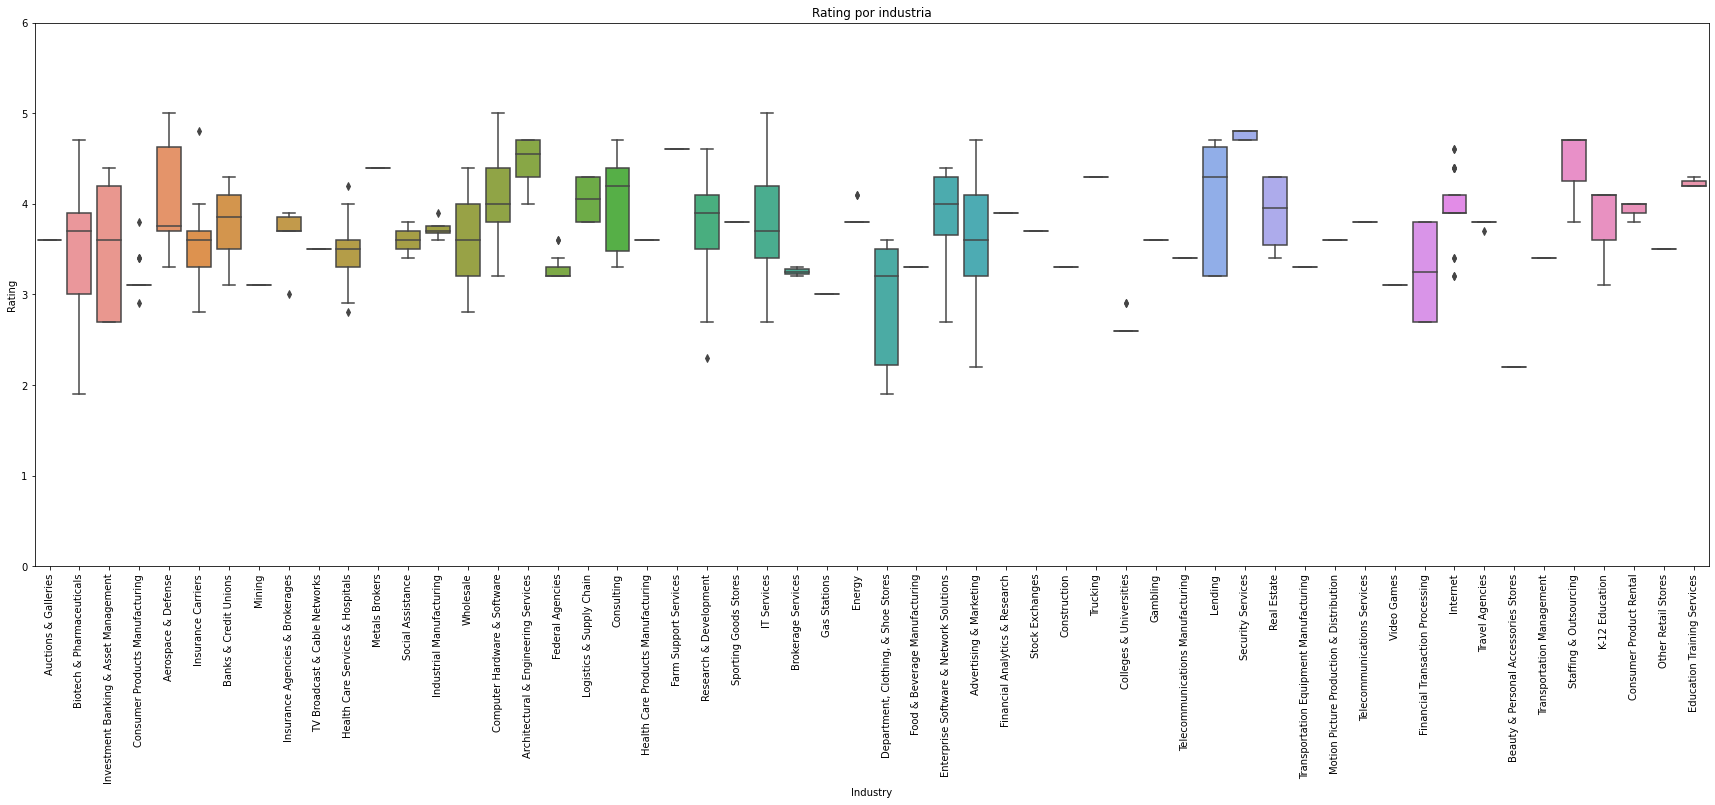

In [19]:
f,ax = plt.subplots(figsize = (30,10))
fig = sns.boxplot(x='Industry', y='Rating',data = by_year)
fig.axis(ymin=0,ymax=6)
plt.xticks(rotation=90)
plt.title("Rating por industria")

In [20]:
var = by_year['Founded']
data1 = pd.concat([by_year['Rating'],var], axis=1)
data1.head(10)

,Rating,Founded
277,3.6,1744
178,3.7,1781
172,3.7,1781
261,3.7,1781
676,3.7,1781
259,3.7,1781
289,3.7,1781
270,3.7,1781
342,3.7,1781
174,3.7,1781


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 [Text(0, 0, '1744'),
  Text(1, 0, '1781'),
  Text(2, 0, '1812'),
  Text(3, 0, '1830'),
  Text(4, 0, '1846'),
  Text(5, 0, '1849'),
  Text(6, 0, '1850'),
  Text(7, 0, '1851'),
  Text(8, 0, '1852'),
  Text(9, 0, '1856'),
  Text(10, 0, '1860'),
  Text(11, 0, '1863'),
  Text(12, 0, '1870'),
  Text(13, 0, '1875'),
  Text(14, 0, '1878'),
  Text(15, 0, '1883'),
  Text(16, 0, '1885'),
  Text(17, 0, '1887'),
  Text(18, 0, '1889'),
  

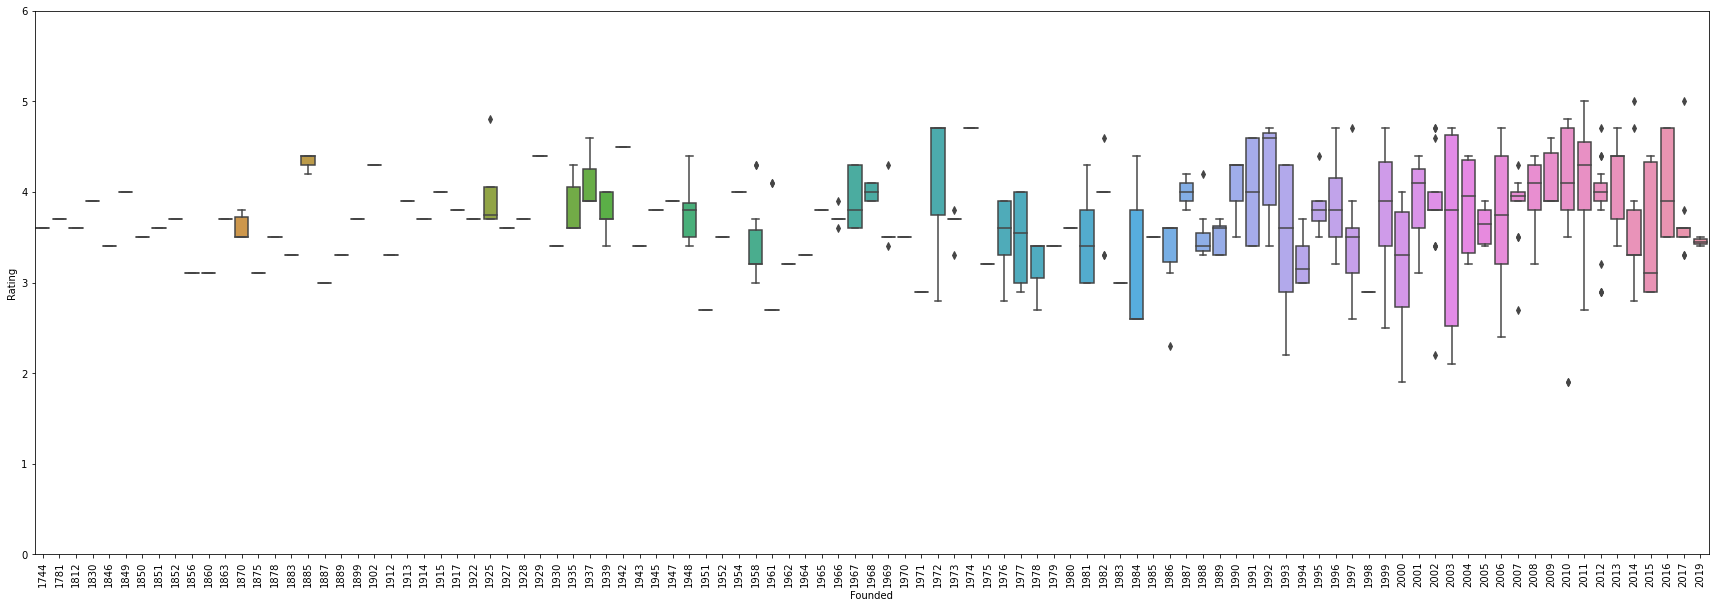

In [21]:
f,ax = plt.subplots(figsize = (30,10))
fig = sns.boxplot(x='Founded', y='Rating',data = data1)
fig.axis(ymin=0,ymax=6)
plt.xticks(rotation=90)